<a href="https://colab.research.google.com/github/lhiwi/credit-risk-model/blob/task-2/notebooks/1.0-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")


In [3]:
# Adjust this path to where your CSV lives
data_path = '/content/drive/MyDrive/Data_5/Data/data.csv'

# Or, if you manually uploaded to Colab:
# data_path = 'data/raw/transactions.csv'

df = pd.read_csv(data_path, parse_dates=['TransactionStartTime'])
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


Summary Statistics & Missing Values

In [4]:
# Numerical summary
display(df.describe().T)

# Missing values
print("\nMissing per column:")
print(df.isna().sum())

# Top categorical counts
cat_cols = ['CurrencyCode','CountryCode','ProviderId','ProductCategory','ChannelId','PricingStrategy','FraudResult']
for col in cat_cols:
    print(f"\n{col} top 5:")
    print(df[col].value_counts(dropna=False).head(5))


,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0



Missing per column:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

CurrencyCode top 5:
CurrencyCode
UGX    95662
Name: count, dtype: int64

CountryCode top 5:
CountryCode
256    95662
Name: count, dtype: int64

ProviderId top 5:
ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
Name: count, dtype: int64

ProductCategory top 5:
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
Name: count, dtype: int64

ChannelId top 5:
ChannelId
Channe

Visualization

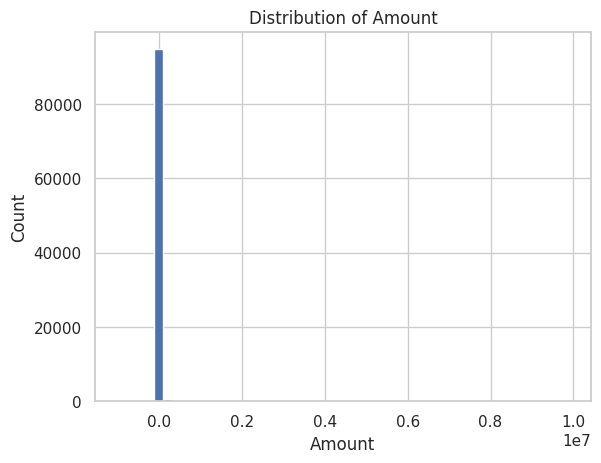

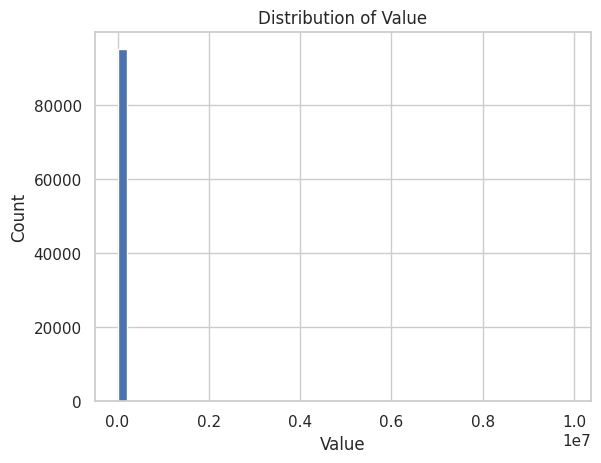

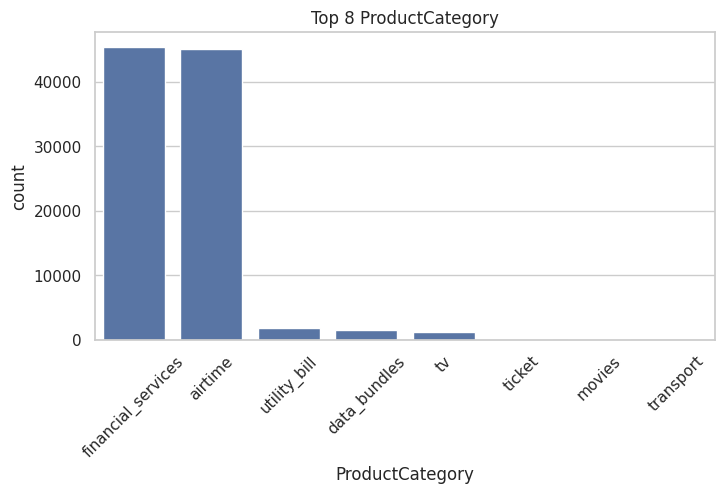

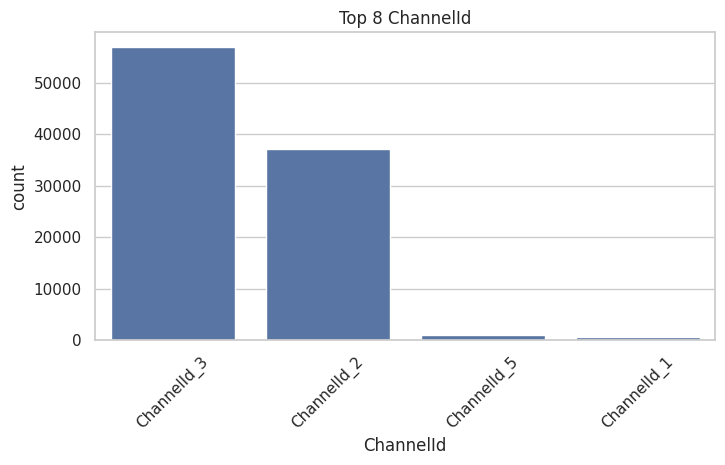

In [5]:
# Histograms for numeric columns
num_cols = ['Amount','Value']
for col in num_cols:
    plt.figure()
    df[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Countplots for key categoricals
for col in ['ProductCategory','ChannelId']:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:8])
    plt.xticks(rotation=45)
    plt.title(f'Top 8 {col}')
    plt.show()


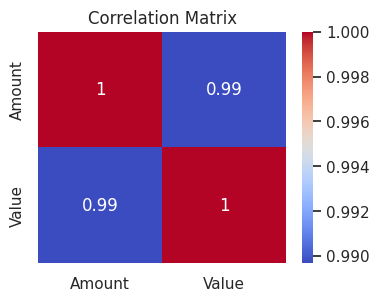

Amount outliers: 24441
Value outliers: 9021


In [6]:
# Correlation heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Simple IQR outlier counts
for col in num_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    mask = (df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)
    print(f"{col} outliers: {mask.sum()}")
